# Introduction to the Bayesian approach

Bayesian theory can be applyed for
- **Bayesian learning of network weights**
- **Distribution of network outputs: regression**
- **Distribution of network outputs: classification**

#### Interesting urls

- http://www.scielo.br/scielo.php?script=sci_arttext&pid=S0104-65001997000200006
- http://twiecki.github.io/
- http://dennisprangle.github.io/research/2016/06/07/bayesian-inference-by-neural-networks
- general: https://www.analyticsvidhya.com/blog/2015/11/free-resources-beginners-deep-learning-neural-network/
- MCMC: http://videolectures.net/mlss09uk_murray_mcmc/
- http://sebastianraschka.com/blog/2016/model-evaluation-selection-part2.html
- https://blog.quantopian.com/bayesian-deep-learning2/
- https://people.eecs.berkeley.edu/~jordan/papers/variational-intro.pdf
- https://lingpipe-blog.com/2013/03/25/mean-field-variational-inference-made-easy/

#### Code
- https://github.com/aloctavodia/Doing_bayesian_data_analysis
- Bayesian Neural Network in PyMC3: 
    - https://gist.github.com/anonymous/d7d6ee33e06ba1845dda94b5137dfba3
- https://github.com/gpschool/gprs15b

#### videos

- pyMC: https://www.youtube.com/watch?v=XbxIo7ScVzc
- pyMC3: https://www.youtube.com/watch?v=VVbJ4jEoOfU
- pyMC3: https://www.youtube.com/watch?v=coEVZNg_nlA
- Variational inference: https://www.youtube.com/watch?v=4toWtb7PRH4
- Bayesian regression Neil Lawrence: https://www.youtube.com/watch?v=z0PBxczUx9A

#### Books

- https://www.amazon.es/Bayesian-Nonparametrics-Paperback-Statistics-Probability/dp/0898715636/ref=sr_1_4?ie=UTF8&qid=1474280093&sr=8-4&keywords=bayesian+neural+networks
- https://www.amazon.es/Bayesian-Artificial-Neural-Networks-Applications/dp/3639223241/ref=sr_1_2?ie=UTF8&qid=1474280093&sr=8-2&keywords=bayesian+neural+networks
- http://camdavidsonpilon.github.io/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/

#### Error bars non bayesian approach

- http://blog.datadive.net/prediction-intervals-for-random-forests/

#### Introduction to the Bayesian approach 

The Bayesian approach  treats the issue of model complexity very differently from cross validation. It allows all of the
available data to be used for 'training' (instead of splitting the data into train and validation).

To gain insight into why this makes any sence we can consider a hypothetical example where three different models $H_1$,$H_2$ and $H_3$ which have steadily increasing flexibility corresponding with the increasing number of hidden units.  Thus, each model consists of a specification of the network architecture (number of units, type of activation function, etc.) and is governed by a number of adaptive parameters. By varying the values of these parameters, each model can represent a range of input-output functions. The more complex models, with a greater number of hidden units for instance, can represent a greater range of such functions.

Let us assume we have a set of input vectors $X= \{x^1, \dots, x^M \}$ and a corresponding set of target vectors $Y= \{y^1, \dots, y^M \}$. We can consider the posterior probability for each of the models given the observed data (targets) $Y$ (shouldn't be X????).

Using Bayes' theorem we have:

\begin{equation}
p(H_i \vert Y) = \frac{p(Y \vert H_i) p(H_i)}{p(Y)}
\end{equation}

- The term $ p(H_i)$ is the prior probability for model $H_i$. If we have no reason to prefer one model over another, then we would assign equal prior probability to all models.

- The term $ p(Y)$ does not depend on the model. We will see that different models can be compared by evaluating $p(Y \vert H_i)$. The term $p(Y \vert H_i)$ is called the **evidence for model $H_i$**.
    - This indicates that the Bayesian approach can be used to select a particular model for which the evidence is largest. We might expect that the model with the greatest evidence is also the one which will have the best generalization performance. The will see it on detail.
    
    - We shall see that the correct Bayesian approach is to make use of
the complete set of models. Predicted outputs for new input vectors are obtained by performing a weighted sum over the predictions of all the models, where the weighting coefficients depend on the evidence. More probable models therefore contribute more strongly to the predicted output. **Since the evidence  $p(Y \vert H_i)$ can be evaluated using the training data, we see that Bayesian methods are able to deal with the issue of model complexity, without the need to use cross-validation**.

#### Marginalization

Bayesian inference is based on marginalization. The process of marginalization involves integrating out unwanted variables. Imagine we are discussing a model with two variables $w$ and $\alpha$. The most complete description of these variables is in terms of the joint distribution $p(\alpha, w)$. Nevertheless if we are interested only in the distribution of $w$ then we can integrate out $\alpha$ as follows:

\begin{equation}
p(w) = \int p(w,\alpha) d\alpha =  \int p(w \vert\alpha) p(\alpha) d\alpha 
\end{equation}

we say that the predictive distribution over $w$ is obtained by averaging the conditional distribution $p(w\vert \alpha)$ with a weighting factor $p(\alpha)$. 


# Examle by Zoubin Ghahramani MLSS


- Binary variable $X  \in \{0,1\}$ following a Bernoulli distribution:
    $$ P(x | q) = P(x ; q) = q^x (1-q)^{(1-x)} $$
    where $q \in [0,1]$
   
- Data $D = \{ x_n : n=1,\dot,N \}$
- Prior 
    $$P(q) = 1 \text{ for } q \in [0,1]$$

Compute the posterior after $x_1 = 1$ has been observed



#### Solution

The posterior $P(q|D=\{x_1=1\})$ is 

$$
   P(q|D=\{x_1=1\}) =\frac{P(D|q) P(q)}{P(D)} 
$$

where we can emphasize $q_0$ as the initial $q$ and then find the posterior of $q$ given $q_0$:

- $P(D|q)=p( \{x_1=1\} |q_0) = q_0^1(1-q_0)^{1-1}= q_0 $
- $P(q)= \mathbb{1}_{q \in [0,1]} (q)$

So far we know:

$$
   P(q|D=\{x_1=1\}) \propto P(D|q) P(q) =   \mathbb{1}_{q \in [0,1]} (q)  \cdot q_0 = \mathbb{1}_{q \in [0,1]} (q) q_0 
$$

therefore 

$$
   P(q|D=\{x_1=1\}) = c \cdot \mathbb{1}_{q \in [0,1]} (q) q_0 
$$

Since it is a probability distribution it must integrate to 1


$$
   \int_{-\infty}^\infty P(q|D=\{x_1=1\}) \, dq =  \int_{-\infty}^\infty c \cdot   q_0 \cdot \mathbb{1}_{q \in [0,1]} (q) \, dq =1
$$
therefore 
$$
\int_{0}^1 c \cdot   q_0  dq_0 =1 \Rightarrow \frac{1}{c} = \int_{0}^1    q_0   dq_0 = \left[ \frac{q_0^2}{2} \right]_0^1 = \frac{1}{2} - 0 = \frac{1}{2} \Rightarrow c=2
$$ 

Therefore now the posterior $   P(q|D=\{x_1=1\})$ is

$$
   P(q|D=\{x_1=1\}) = 2 \cdot \mathbb{1}_{q \in [0,1]} (q) 
$$

That is the line $y=2x$ between 0 and 1.


#### MLE of q

Notice that the MLE of $q$ is 1 since it is the point where the probability of $q$ is maximized.

#### P(x_2 | x_1=1)

It is 2/3 (think about it)




## Bayesian learning of network weights

The first problem we shall address is that of learning the weights in a neural network on the basis of a set of training data. The standard approach used for training a neural network consist on maximizing the likelihood function (equivalent to minimizing an error function). This process finds a single set of values for the network weights. By contrast,the Bayesian approach 

- considers a probability distribution function over weight space, representing the relative degrees of belief in different values for the weight vector. This function is initially set to some prior distribution. 
- Once the data has been observed it can be converted to a posterior distribution using Bayes' theorem. The posterior distribution can then be used to evaluate the predictions of the trained network for new values of the input variables.



- https://www.cs.cmu.edu/afs/cs/academic/class/15782-f06/slides/

Maximum likelihood estimation is based on finding the (single) most likely value for the parameters of the model $\Theta$ given the observed data. The Bayesian approach is rather different. In the Bayesian approach the uncertainty in the value of the parameters is captured by a density function.


#### Usual names given to the probabilities

- $P(\theta \vert X)$ is the posterior probability of the parameters given the data. Usually referred to as the posterior probability.


- $P(\theta)$ is the prior probability of the parameters. Usually referred to as the prior.


- $P(X \vert \theta)$ is the conditional likelihood of the data. 


- $P(X)$ is the total probability of the data.



If we assume  $X= \{x^1, \dots, x^M \}$ and  the data is drawn independently from the same underlying distribution,then we can write

\begin{equation}
p(X \vert \theta) = \prod_{m=1}^M p(x^m \vert \theta)
\end{equation}


#### Brief introduction to bayesian inference for the parameters of the network


Before learning, the parameters are described by a prior probability density  $p(\theta)$. This prior is normally very broad and reflects the fact the we have little idea of what are good values of the parameters. During learning, when the data is observed, we can use Bayes'theorem to find the corresponding posterior proability density $P(\Theta \vert X)$. Let us see it in detail


We will start by writting the density function of an input vector $\textbf{x}$ given the training data $X$. That is 

\begin{equation}
p( \textbf{x} \vert X) = \int p(x, \theta  \vert X)  d\theta
\end{equation}

Notice that the probability $p(x, \theta \vert X)=p(x \vert \theta, X) p(\theta  \vert  X)$, therefore

\begin{equation}
p( \textbf{x} \vert X) = \int p(x \vert \theta, X) p(\theta  \vert  X) d\theta
\end{equation}

The first factor $ p(x \vert \theta, X)$ is independent of $X$ by construction since we assume that our density is completly specified once the values of the parameters $\theta$ have been found. Therefore


\begin{equation}
p( \textbf{x} \vert X) = \int p(x \vert \theta) p(\theta  \vert  X) d\theta
\end{equation}


The previous formula tell us that the Bayesian approach instead of choosing a specific value for $\theta$ performs a weighted average over all values of $\theta$. The weights are given by the posterior distribution (of the parameters), $p(\theta \vert X)$. 

#### How to compute the posterior distribution  $p(\theta \vert X)$

This posterior is determined by starting from some assumed prior distribution $p(\theta)$  and then updating it using Bayes' theorem to take into account the data $X$. Let us concrete the procedure.

\begin{equation}
p(\theta \vert X) := \frac{p(\theta,X)}{p(X)} = \frac{p(X \vert \theta)p(\theta)}{p(X)} =  \frac{p(\theta)}{p(X)} p(X \vert \theta) = 
  \frac{p(\theta)}{p(X)} \prod_{m=1}^M p(x^m \vert \theta)
\end{equation}



The term $P(X)$ is given by

\begin{equation}
p(X) = \int p(\theta^\prime) \prod_{m=1}^M p(x^m \vert \theta^\prime) d \theta^\prime
\end{equation}

#### The difficulties of the integrals for $p(x \vert X)$ and  $p( X)$

Typically the evaluation of the integrals required to compute  $p(x \vert X)$ and  $p(X)$ is only analytically feasible for very specific density functions. Those special density functions require the posterior density  $p(\theta \vert X) $ to have the same functional form as the prior.

### Distribution of weights

We begin by considering the problem of training a network in which the architecture (number of layers, number of hidden units, choice of activation functions  etc.) is given. In the conventional maximum likelihood approach, a single 'best' set of weight values is determined by minimization of a suitable error function. In the Bayesian framework, however, we consider a probability distribution over
weight values. In the absence of any data, this is described by a prior distribution which we shall denote by $p(w)$, and whose form we shall discuss shortly. Here $w = \{w_1,\dots, w_K\}$ denotes the vector of weight and bias parameters.


Let us assume we have a set of input vectors $X= \{x^1, \dots, x^M \}$ and a corresponding set of target vectors $Y= \{y^1, \dots, y^M \}$. We can consider the posterior probability:

\begin{equation}
p(w \vert Y ) = \frac{p(Y\vert w) p(w)}{p(Y)}
\end{equation}

where the denominator is a normalization constant


\begin{equation}
p( Y ) = \int  p(Y\vert w) p(w) \, \text{d} w
\end{equation}

which ensures that $p(w \vert Y )$ defined using Bayes' theorem gives the unity when integrated over all weight space.  We shall see shortly that $p(Y \vert w)$ (which represents a model for the noise process on the target data) corresponds to the likelihood function. 

Since the data set consists of input $X$ as well as target data $Y$, the input values should strictly be included in Bayes' theorem which should be written in the form:


\begin{equation}
p(w \vert  X, Y ) = \frac{p(Y\vert w, X) p(w \vert X)}{p(Y \vert X)}
\end{equation}

As we have already noted in earlier, however, feed-forward networks trained by supervised learning do not in general model the distribution p(x) of the input data. Therefore X always appears as a conditioning variable on the right-hand side of the probabilities in the previous equation. **We shall therefore continue to omit it from now on in order to simplify the notation**.


The picture of learning provided by the Bayesian formalism is as follows. 

- We start with some prior distribution over the weights given by p(w). Since we generally have little idea at this stage of what the weight values should be, the prior might express some rather general properties such as smoothness of the network function, but will otherwise leave the weight values fairly unconstrained. The prior will therefore typically be a rather broad distribution.
- Once we have observed the data, this prior distribution can be converted to a posterior distribution using Bayes' theorem in the form
of  \begin{equation}
p(w \vert Y ) = \frac{p(Y\vert w) p(w)}{p(Y)}
\end{equation}
This posterior distribution will be more compact, expressing the fact that we have learned something about the extent to which different weight values are consistent with the observed data. 
- In order to evaluate the posterior distribution we need to provide expressions for the prior distribution $p(w)$ and for the likelihood function $p(Y\vert w)$




#### Distribution of weights: Gaussian prior

We first consider the prior probability distribution for the weights. This distribution should reflect any prior knowledge we have about the form of network mapping we expect t o find. In general, we can write this distribution as an exponential of the form

\begin{equation}
p(w) = \frac{1}{Z_W(\alpha)} \exp(-\alpha E_W)
\end{equation}

where $Z_W(\alpha)$ is a normalization factor given by

\begin{equation}
Z_W(\alpha) = \int \exp(-\alpha E_W) \, \text{d} w
\end{equation}

This ensures that $\int p(w) \text{d} w = 1$. The role of the parameter $\alpha$ will be explained later on.

##### L2 regularization for $E_W$

We can train the network favouring small values for the network weights. To do so, we can use L2 regularization which consist on considering $E_W$ to be halve the L2 norm of the weights. That is 

\begin{equation}
E_W = \frac{1}{2} \| w \|^2 = \frac{1}{2} \sum_{i=1}^W w_i^2
\end{equation}

where $W$ is the total number of weights and biases in the network. Using this regularizer our prior distribution will be:

\begin{equation}
p(w) = \frac{1}{Z_W(\alpha)} \exp(- \frac{\alpha}{2} \| w \|^2)
\end{equation}

Notice that  $\| w \|^2$ large will imply $E_W $ to be large which will imply $p(w)$ to be small. In fact this prior probability will go to zero as the network weights grow:

\begin{equation}
\lim_{\| w \|^2 \longrightarrow \infty} p(w) = \lim_{\| w \|^2 \longrightarrow \infty} \frac{1}{Z_W(\alpha)} \exp(- \frac{\alpha}{2} \| w \|^2) = \lim_{\| w \|^2 \longrightarrow \infty} \frac{1}{Z_W(\alpha)} \frac{1}{\exp( \frac{\alpha}{2} \| w \|^2)}  = \frac{1}{\infty} = 0
\end{equation}

This choice of prior distribution will foster small weight values rather than large weight values which should help us not to overfit the training data too much. The $\alpha$ parameter will control how much we penalize the model for having big or small norm on all weights. To begin with, let us assume that the parameter $\alpha$ is known. Later on, we will see how to treat $\alpha$ as part of the learning process.

Using L2 regularization implies that $p(w)$ has a gaussian function form. If we impose that the integral of $p(w)$ with respect to $w$ has to be one we can find the form for the $Z_W(\alpha)$ coefficient.


\begin{equation}
1 = \int p(w) \text{d}w = \int \frac{1}{Z_W(\alpha)} \exp(- \frac{\alpha}{2} \| w \|^2)  \text{d}w \Rightarrow Z_W(\alpha) = \int \exp(- \frac{\alpha}{2} \| w \|^2) \text{d}w
\end{equation}


We can could do the integral or just realize the similarity between a multidimensional d-dimensional Gaussian  (Normal) distribution which has the following form:

\begin{equation}
N(x ; \mu,\Sigma) =  \frac{1}{(2 \pi)^{d/2}} |\Sigma|^{-1/2} \exp \left(-\frac{1}{2}(x-\mu) \Sigma^{-1}(x-\mu)^T \right)
\end{equation}

If we consider the mean vector to be zero and the covariance matrix to be the Identity then the previous formula can be written as

\begin{equation}
N(x ; \mu,\Sigma) =  \frac{1}{(2 \pi)^{d/2}} \exp \left(-\frac{1}{2}x x^T \right) =   \frac{1}{(2 \pi)^{d/2}} \exp \left(-\frac{1}{2} \|x\|^2 \right) 
\end{equation}

Our expression was

\begin{equation}
p(w) = \frac{1}{Z_W(\alpha)} \exp(- \frac{\alpha}{2} \| w \|^2)
\end{equation}

Therefore if we choose $Z_W(\alpha)$ as follows we get a Normal distribution (WRITE DETAILS)

\begin{equation}
Z_W(\alpha) =  \left(\frac{2 \pi}{\alpha}\right)^{W/2}
\end{equation}



# Summary bayesian learning of weights

In order to do bayesian learning of weights we need:

- 1) A model, a prior distribution over parameters and a dataset:
    - Define a parametreized model assumed to map X to Y
    - Define a prior distribution of parameters $p(\textbf{w})$
    - Define a dataset $D = \{ (x^1,y^1), \dots,(x^M,y^M)  \}$
    
    
- 2) **Convert model definition into a standard probabilistic form that is specify the likelihood of output $y^m$ given $x^m$ and  $\textbf{w}$**. That is $p(y | x ;w)$


- 3) **Posterior distribution**: 
\begin{equation}
p(D | \textbf{w}) = \prod_{m=1}^M p(y^m | x^m; \textbf{w})
\end{equation}

\begin{equation}
p(\textbf{w} | D) = \frac{\prod_{m=1}^M p(y^m | x^m; \textbf{w})}{\int p(\textbf{w}^\prime)\prod_{m=1}^M p(y^m | x^m;\textbf{w}^\prime) d\textbf{w}^\prime   }
\end{equation}


- 4) **Prediction**: The residual uncertainty in the parameters w gen-
erates uncertainty in subsequent data prediction. Prediction of the
output t corresponding to a new input $x$ , given our observation of
the data D and our choice of model, thus takes the probabilistic form:

\begin{equation}
p(y |x ; D) = \int p(y | x,\textbf{w}) p(\textbf{w} | D) d\textbf{w}
\end{equation}

This concludes the description of Bayesian learning for a single model: the problem has in principle been reduced to doing integrals, although how one evaluates these efficiently is quite another matter. Before we move on to the remainder of this section, which deals with implementation and understanding, and with the generalization of the ideas to model selection, two comments on the expression for $p(D | w)$.

### Example Bayesian learning classification

Let us consider the data

In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
import numpy as np
X = np.array([[-5,-5], [-1,0], [1,0], [5,5]])
Y = np.array([0,1,0,1])

In [5]:
X

array([[-5, -5],
       [-1,  0],
       [ 1,  0],
       [ 5,  5]])

In [6]:
X[:,1]

array([-5,  0,  0,  5])

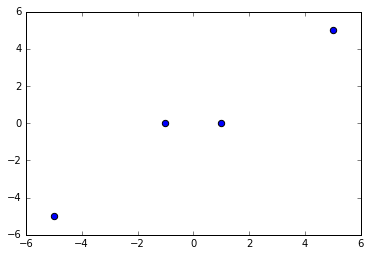

In [7]:
import matplotlib
from matplotlib import pyplot as pyplot

pyplot.scatter(X[:,0], X[:,1], s=40)

### Pieces needed to perform bayesian learning 

In this example we are assuming our data $x=(x_1,x_2) \in \mathcal{X}$ is 2D and our target takes binary values in $\{0,1\}$. 

- 1) A model, a prior distribution over parameters and a dataset:
    - Define a parametreized model assumed to map X to Y
        <font color='red'>
        - We will assume the model is a logistic regression. That is
        
        \begin{equation}
          h(x ; w) = \frac{1}{1 + exp(-w^T x)}
        \end{equation}
        </font>
    
    - Define a prior distribution of parameters $p(\textbf{w})$:
         <font color='red'>
        - We will use a 2D gaussian distribution 
    
        \begin{equation}
        p(w) =  \frac{1}{2\pi} \exp( -\frac{1}{2} \|w\|^2)
        \end{equation}
        </font>
        
    - Define a dataset $D = \{ (x^1,y^1), \dots,(x^M,y^M)  \}$
        <font color='red'>

        - We will start with a dataset with 2 points, $(5,5)$ from class 1 and $(-5,-5)$ from class 0. That is $$D = \{ ((5, 5),1), ((-5, -5),0) \}$$
            </font>

    
- 2) **Convert model definition into a standard probabilistic form that is specify the likelihood of output $y^m$ given $x^m$ and  $\textbf{w}$**. That is $p(y | x ;w)$
    
    <font color='red'>
    - We will use the following definition 
        
        \begin{equation}
        h(x;w):= p(y=1 | x ;w) = \frac{1}{1 + exp(-w^T x)}
        \end{equation}
     </font>

- 3) **Posterior distribution**: 
\begin{equation}
p(D | \textbf{w}) = \prod_{m=1}^M p(y^m | x^m; \textbf{w})
\end{equation}

\begin{equation}
p(\textbf{w} | D) = \frac{\prod_{m=1}^M p(y^m | x^m; \textbf{w})}{\int p(\textbf{w}^\prime)\prod_{m=1}^M p(y^m | x^m;\textbf{w}^\prime) d\textbf{w}^\prime   }
\end{equation}


- 4) **Prediction**: The residual uncertainty in the parameters w generates uncertainty in subsequent data prediction. Prediction of the
output t corresponding to a new input $x$ , given our observation of
the data D and our choice of model, thus takes the probabilistic form:

\begin{equation}
p(y |x ; D) = \int p(y | x,\textbf{w}) p(\textbf{w} | D) d\textbf{w}
\end{equation}


#### Gaussian Prior distribution of the weights

We shall choose a Gaussian prior distribution for the weights, in which the parameter α is given a fixed value of α=1. Then $Z_W(\alpha) =  \left(\frac{2 \pi}{\alpha}\right)^{W/2}= 2 \pi$ and therefore

$$
p(w) =  \frac{1}{2\pi} \exp( -\frac{1}{2} \|w\|^2)
$$

In [8]:
def prior(w):
    return (1/(2*np.pi)) * np.exp(-0.5 * np.linalg.norm(w))

In [11]:
w_grid = []
w_grid_eval = []
for w1 in  [x*0.1 for x in range(-100,100,1)]:
    for w2 in  [x*0.1 for x in range(-100,100,1)]:
        w = np.array([w1,w2])
        w_grid.append(w)
        w_grid_eval.append(prior(w))
        
w_grid = np.array(w_grid)

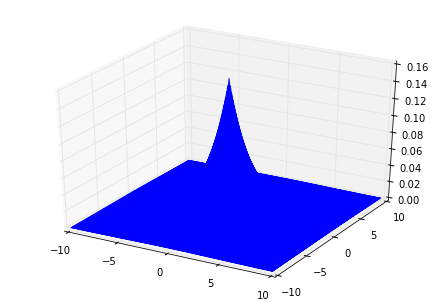

In [12]:
from mpl_toolkits.mplot3d import axes3d, Axes3D

fig = pyplot.figure()
ax = Axes3D(fig)
ax.plot(w_grid[:,0], 
        w_grid[:,1], 
        w_grid_eval)

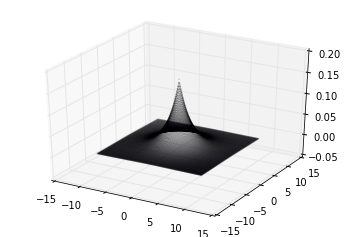

In [24]:
vals = [x for x in range(-10,10,1)]

fig = pyplot.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(w_grid[:,0],w_grid[:,1], w_grid_eval, s=0.01)

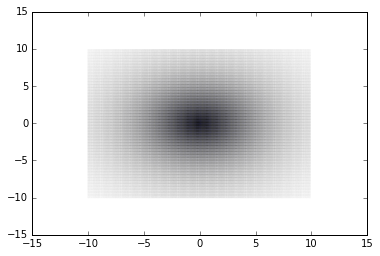

In [25]:
pyplot.scatter(w_grid[:,0], 
               w_grid[:,1], 
               w_grid_eval)

In [26]:
def output(x,w):
    return 1./(1+np.exp(-np.dot(w,x)))



##### Computing  $P(Y \vert w)$

\begin{equation}
P(Y \vert w) = \prod_{m=1}^M P(y=y^m \vert w) = P(y=Y[0] \vert x) P(y=Y[1] \vert w) P(y=Y[2] \vert w) P(y=Y[3] \vert w)
\end{equation}

If we assume $P(y=1 \vert x) = \lambda$ and $P(y=0 \vert x) = 1- \lambda$ then 

\begin{equation}
P(Y \vert w) = (1- \lambda)^2  \lambda^2
\end{equation}


#### Gaussian Prior distribution of the weights



Assume now we have only 2 points, X = [[5,5],[-5,-5]].

Let us use the Bayes' theorem to compute the posterior distribution of weights.

- Once we have observed the data, this prior distribution can be converted to a posterior distribution using Bayes' theorem in the form
of  \begin{equation}
p(w \vert Y ) = \frac{p(Y\vert w) p(w)}{p(Y)}
\end{equation}
This posterior distribution will be more compact, expressing the fact that we have learned something about the extent to which different weight values are consistent with the observed data. 
- In order to evaluate the posterior distribution we need to provide expressions for the prior distribution $p(w)$ and for the likelihood function $p(Y\vert w)$

In [33]:
X = np.array([[5, 5], [-5, -5]])
Y = np.array([1, 0])

In [34]:
def prob_target_given_input(x,w):
    return 1./(1+np.exp(-np.dot(w,x)))

In [35]:
def prior(w):
    return (1/(2*np.pi)) * np.exp(-0.5 * np.linalg.norm(w))

In [36]:
def class_prob(y):
    return 0.5

In [37]:
p_Y_given_w = sigmoid
p_w = prior
p_Y = class_prob

In [38]:
def p_w_given_Y (w,y):
    return (p_Y_given_w (y,w) * p_w(w) )/ p_Y(y)

Now we can plot the posterior distribution given the data

In [39]:
w_grid = []
for w1 in np.linspace(-10,10):
    for w2 in np.linspace(-10,10):
        w = np.array(w1,w2)
        w_grid.append(w)
        p_w_given_Y (w,y=1)
        

In [40]:
np.linspace(0,10)

array([  0.        ,   0.20408163,   0.40816327,   0.6122449 ,
         0.81632653,   1.02040816,   1.2244898 ,   1.42857143,
         1.63265306,   1.83673469,   2.04081633,   2.24489796,
         2.44897959,   2.65306122,   2.85714286,   3.06122449,
         3.26530612,   3.46938776,   3.67346939,   3.87755102,
         4.08163265,   4.28571429,   4.48979592,   4.69387755,
         4.89795918,   5.10204082,   5.30612245,   5.51020408,
         5.71428571,   5.91836735,   6.12244898,   6.32653061,
         6.53061224,   6.73469388,   6.93877551,   7.14285714,
         7.34693878,   7.55102041,   7.75510204,   7.95918367,
         8.16326531,   8.36734694,   8.57142857,   8.7755102 ,
         8.97959184,   9.18367347,   9.3877551 ,   9.59183673,
         9.79591837,  10.        ])

p_w_given_Y(w,y=1)

## Distribution of network outputs

## Distribution of network outputs: classification